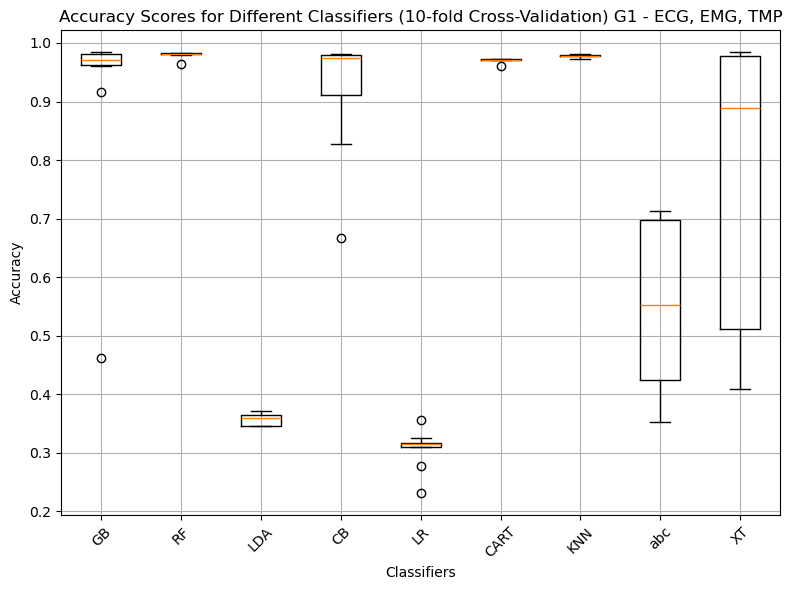

In [1]:
# loaded model for RF Dataverse
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings('ignore')

# Read in data as pandas dataframe and display first 5 rows
dataset = pd.read_csv('/Users/samson/Documents/Final3/wesad2/combined_data.csv')

# label_mapping = {"baseline": 0, "meditation": 0, "amusement": 0, "stress": 1}
# dataset['condition'] = dataset['condition'].replace(label_mapping)

#subCol = ['pNN25','MEAN_RR','HR','MEDIAN_RR','LF_PCT','HF']
subCol = ['ECG_mean', 'EDA_mean', 'EMG_mean', 'Temp_mean']

y = dataset['condition'].copy()
X = dataset[subCol]

# def preprocess_inputs(df):
#     df = df.copy()
    
#     df['condition'] = df['condition'].replace(label_mapping)
    
#     y = df['condition'].copy()
#     X = df[subCol]
#     #X = df.drop('condition', axis=1).copy()
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
#     return X_train, X_test, y_train, y_test

# X_train, X_test, y_train, y_test = preprocess_inputs(dataset)

# Define the directory containing the dumped files
directory = '/Users/samson/Documents/Final3/wesad2/result'  # Update this to your directory

# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier
test_scores = {clf_name: result['cv_results']['mean_test_score'] for clf_name, result in results.items()}

# Create a boxplot for accuracy scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(test_scores.values())
plt.xticks(range(1, len(test_scores) + 1), test_scores.keys(), rotation=45)
plt.title('Accuracy Scores for Different Classifiers (10-fold Cross-Validation) G1 - ECG, EMG, TMP')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()


Classifier: GB
Fold 1: Mean accuracy: 0.9162, Mean F1 score: 0.9821
Fold 2: Mean accuracy: 0.9159, Mean F1 score: 0.9821
Fold 3: Mean accuracy: 0.9156, Mean F1 score: 0.9821
Fold 4: Mean accuracy: 0.9193, Mean F1 score: 0.9821
Fold 5: Mean accuracy: 0.9133, Mean F1 score: 0.9821
Fold 6: Mean accuracy: 0.9167, Mean F1 score: 0.9821
Fold 7: Mean accuracy: 0.9203, Mean F1 score: 0.9821
Fold 8: Mean accuracy: 0.9180, Mean F1 score: 0.9821
Fold 9: Mean accuracy: 0.9162, Mean F1 score: 0.9821
Fold 10: Mean accuracy: 0.9214, Mean F1 score: 0.9821
Overall Mean Accuracy: 0.9173
Overall Mean F1 Score: 0.9821


Classifier: RF
Fold 1: Mean accuracy: 0.9804, Mean F1 score: 0.9798
Fold 2: Mean accuracy: 0.9801, Mean F1 score: 0.9798
Fold 3: Mean accuracy: 0.9826, Mean F1 score: 0.9798
Fold 4: Mean accuracy: 0.9808, Mean F1 score: 0.9798
Fold 5: Mean accuracy: 0.9761, Mean F1 score: 0.9798
Fold 6: Mean accuracy: 0.9796, Mean F1 score: 0.9798
Fold 7: Mean accuracy: 0.9791, Mean F1 score: 0.9798
Fold 8

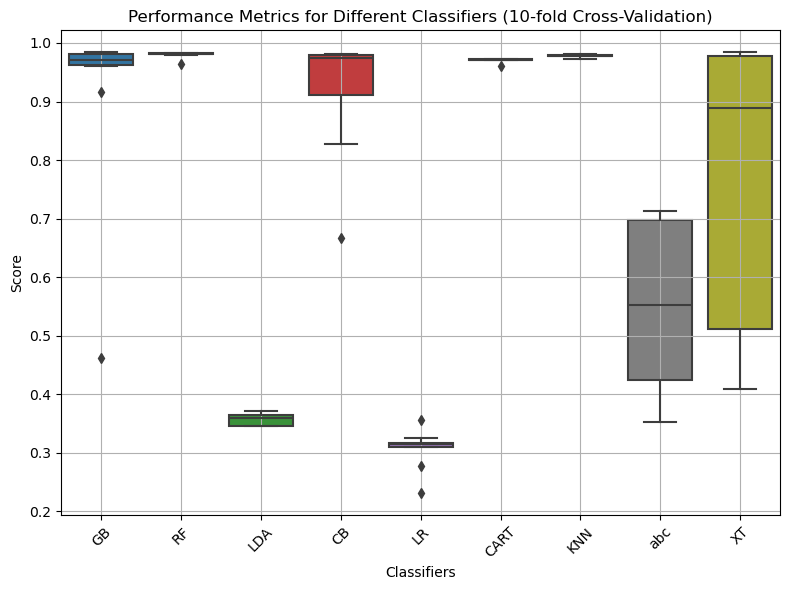

In [2]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')


# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier and find the best one
best_score = 0
best_clf_name = None
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")

    # Extract the cross-validation results
    cv_results = result['cv_results']

    # Number of folds - this assumes that each 'split{i}_test_score' is present in the results
    n_folds = len([key for key in cv_results.keys() if key.startswith('split') and key.endswith('test_score')])

    # Print the accuracy and F1 score for each fold
    for fold_idx in range(n_folds):
        fold_accuracy_key = f'split{fold_idx}_test_score'
        fold_accuracy = cv_results[fold_accuracy_key].mean()

        fold_f1_key = f'split{fold_idx}_test_f1_score'  # Assuming F1 scores are stored with this pattern
        fold_f1_score = result['test_f1_score'] if 'test_f1_score' in result else None  # Extract F1 score if available

        print(f"Fold {fold_idx + 1}: Mean accuracy: {fold_accuracy:.4f}, Mean F1 score: {fold_f1_score:.4f}")

    # Calculate and print the overall mean accuracy across all folds
    mean_accuracy = sum(cv_results[f'split{i}_test_score'].mean() for i in range(n_folds)) / n_folds
    print(f"Overall Mean Accuracy: {mean_accuracy:.4f}")

    # If F1 scores were calculated and stored, calculate and print the overall mean F1 score
    if 'test_f1_score' in result:
        # If F1 scores were stored per fold, you would calculate the mean F1 across folds here
        # As an example, it uses the F1 score from the best model (test set)
        mean_f1_score = result['test_f1_score']
        print(f"Overall Mean F1 Score: {mean_f1_score:.4f}")

    print("\n")

# Visualization code remains the same
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_dict(test_scores, orient='index').transpose()

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Performance Metrics for Different Classifiers (10-fold Cross-Validation)')
plt.ylabel('Score')
plt.xlabel('Classifiers')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()



Best Estimator: GradientBoostingClassifier(max_depth=7, n_estimators=150)
Accuracy: 0.99541
Best Classifier: GB
Best Fold Index: 7
Best Mean Test Score: 0.9839718196489432
Accuracy of Best Classifier: 0.99541
F1 Score of Best Classifier: 0.99465
[1. 1. 1. ... 3. 3. 3.]
Hyperparameters of the Best Classifier (GB):
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


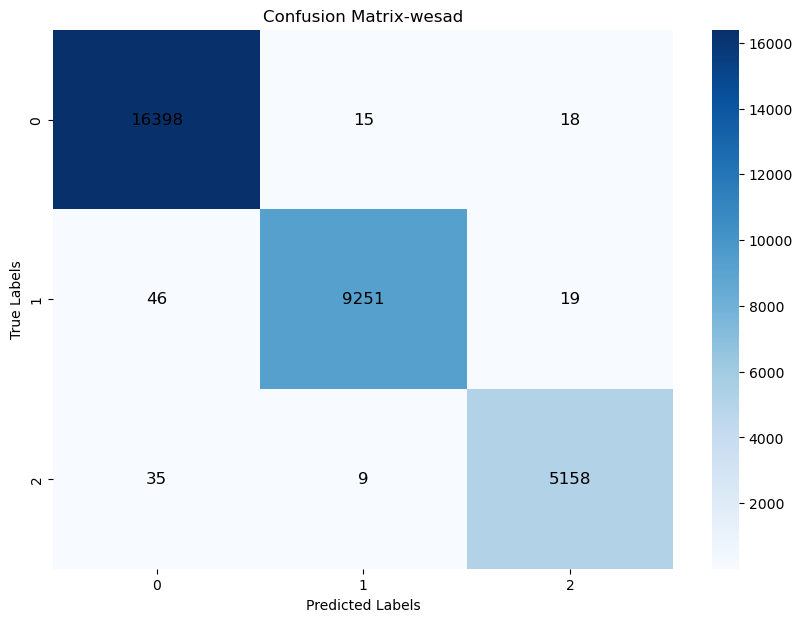

In [3]:
import os
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier and find the best one
best_score = 0
best_clf_name = None
best_fold_idx = None
for clf_name, result in results.items():
    # Retrieve the mean test scores for all folds of the current classifier
    mean_test_scores = result['cv_results']['mean_test_score']
    
    # Find the maximum score and the corresponding fold index for the current classifier
    max_fold_score = max(mean_test_scores)
    max_fold_idx = mean_test_scores.tolist().index(max_fold_score)
    
    # Update the best score, classifier name, and fold index if the current classifier is better
    if max_fold_score > best_score:
        best_score = max_fold_score
        best_clf_name = clf_name
        best_fold_idx = max_fold_idx

# Load the best estimator model for the best classifier
best_estimator = results[best_clf_name]['best_estimator']

# Print the best estimator
print(f"Best Estimator: {best_estimator}")

# Make predictions using the best model on your data
predictions = best_estimator.predict(X)

# Calculate accuracy using 'y' as the true labels
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.5f}")

# # Ensure y_test is of the same type as predictions
y = y.astype(predictions.dtype)

# Calculate the F1 score for the best classifier
f1 = f1_score(y, predictions, average='macro')  # Use 'macro' for multi-class classification, adjust as needed

print(f"Best Classifier: {best_clf_name}")
print(f"Best Fold Index: {best_fold_idx}")
print(f"Best Mean Test Score: {best_score}")
print(f"Accuracy of Best Classifier: {accuracy:.5f}")
print(f"F1 Score of Best Classifier: {f1:.5f}")

print(predictions)

# Load the best estimator model for the best classifier
best_estimator = results[best_clf_name]['best_estimator']

# Print the hyperparameters of the best classifier
print(f"Hyperparameters of the Best Classifier ({best_clf_name}):")
print(best_estimator.get_params())

# Making the Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)

# Plotting the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues')  # Turn off automatic annotation

# Manually add text annotations with better control.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], 
                fontsize=12,  # you can change this size to fit your needs
                ha='center', va='center')

plt.title('Confusion Matrix-wesad')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#wesad
# Accuracy: 0.94852
# Best Classifier: KNN
# Best Mean Test Score: 0.7367053752012239
# Accuracy of Best Classifier: 0.94852
# F1 Score of Best Classifier: 0.92739

#wesad
# Accuracy: 0.92397
# Best Classifier: RF
# Best Fold Index: 0
# Best Mean Test Score: 0.7634384646048215
# Accuracy of Best Classifier: 0.92397
# F1 Score of Best Classifier: 0.88781
# [0 0 0 ... 0 0 0]
# Hyperparameters of the Best Classifier (RF):

# wesad - removing RF
# Accuracy: 0.94924
# Best Classifier: XT
# Best Fold Index: 7
# Best Mean Test Score: 0.7446210800285427
# Accuracy of Best Classifier: 0.94924
# F1 Score of Best Classifier: 0.92839
# [0 0 0 ... 0 0 0]

# swell

# Accuracy: 0.44449
# Best Classifier: RF
# Best Fold Index: 0
# Best Mean Test Score: 0.7634384646048215
# Accuracy of Best Classifier: 0.44449
# F1 Score of Best Classifier: 0.31633

# video

# Accuracy: 0.99852 #when removing knn
# Best Classifier: CART
# Best Fold Index: 9
# Best Mean Test Score: 0.9963334942977904
# Accuracy of Best Classifier: 0.99852
# F1 Score of Best Classifier: 0.99727
